In [ ]:
#import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#read csv .file
df = pd.read_csv('/content/drive/MyDrive/new drive/neural network/twiter.csv', encoding='latin-1')

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


<Axes: xlabel='sentiment', ylabel='count'>

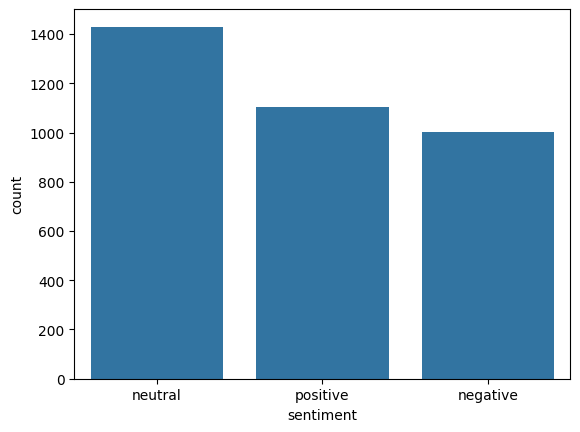

In [ ]:
sns.countplot(x=df['sentiment'])

<Axes: xlabel='sentiment', ylabel='count'>

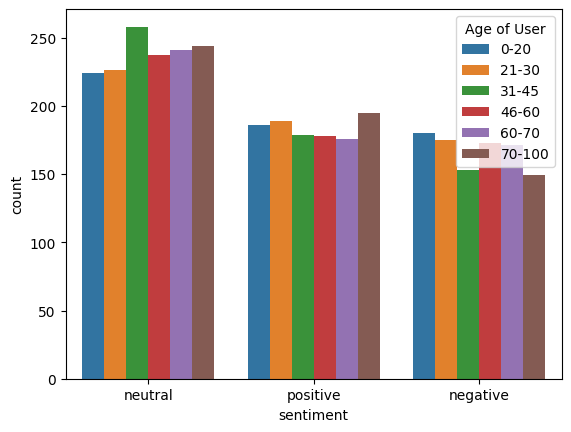

In [ ]:
sns.countplot(x=df['sentiment'],hue=df['Age of User'])

In [ ]:
df.dropna(inplace=True)

In [ ]:
#null
df.isnull().sum()

,0
textID,0
text,0
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [ ]:
# cleaning data
import nltk # Import the nltk library

nltk.download('stopwords')

import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def preprocess_text(text):

    if not isinstance(text, str):

        return ''

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = text.lower()

    tokens = [word for word in text.split() if word not in stop_words]

    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Check if 'selected_text' is in the columns
if 'selected_text' not in df.columns:
    # If not, print a message and stop execution
    print("Column 'selected_text' not found in DataFrame")

# If it is in the columns, proceed with the cleaning process
else:
    df['selected_text'] = df['selected_text'].apply(preprocess_text)
    df['text'] = df['text'].apply(preprocess_text)
    df['text'] = df['text'].astype(str)

Column 'selected_text' not found in DataFrame


In [ ]:
X=df['text']
y=df['sentiment']

In [ ]:
import tensorflow ,keras

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
token=Tokenizer(oov_token="'")

In [ ]:
token.fit_on_texts(X)

In [ ]:
(token.word_index)

{"'": 1,
 'im': 2,
 'day': 3,
 'good': 4,
 'like': 5,
 'get': 6,
 'love': 7,
 'go': 8,
 'got': 9,
 'dont': 10,
 'know': 11,
 'cant': 12,
 'going': 13,
 'work': 14,
 'today': 15,
 'u': 16,
 'back': 17,
 'happy': 18,
 'lol': 19,
 'time': 20,
 'one': 21,
 'see': 22,
 'really': 23,
 'much': 24,
 'well': 25,
 'think': 26,
 'night': 27,
 'oh': 28,
 'new': 29,
 'want': 30,
 'still': 31,
 'miss': 32,
 'thanks': 33,
 'thats': 34,
 'last': 35,
 'home': 36,
 'need': 37,
 'mothers': 38,
 'feel': 39,
 'sad': 40,
 'hope': 41,
 'great': 42,
 'would': 43,
 'haha': 44,
 'ive': 45,
 'ill': 46,
 'tomorrow': 47,
 'twitter': 48,
 'right': 49,
 'morning': 50,
 'could': 51,
 'wish': 52,
 'though': 53,
 'fun': 54,
 'better': 55,
 'gonna': 56,
 'tonight': 57,
 'bad': 58,
 'nice': 59,
 'getting': 60,
 'sorry': 61,
 'never': 62,
 'didnt': 63,
 'sleep': 64,
 'watching': 65,
 'hey': 66,
 'even': 67,
 'school': 68,
 'youre': 69,
 'weekend': 70,
 'make': 71,
 'bed': 72,
 'made': 73,
 'yes': 74,
 'people': 75,
 'come

In [ ]:
max(token.word_index)

'zsnagy'

In [ ]:
sentences=token.texts_to_sequences(X)

In [ ]:
len(sentences)

3534

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
padded=pad_sequences(sentences,padding='pre')

In [ ]:
padded.shape

(3534, 21)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
y=encode.fit_transform(y)

In [ ]:
from keras import Sequential
from keras.layers import Dense,LSTM , Dropout ,Embedding

In [ ]:
model=Sequential()
model.add(Embedding(30000,2,input_length=24))
model.add(LSTM(150))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
max(len(x) for x in sentences)

21

In [ ]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [ ]:
model.fit(padded,y,epochs=5)

Epoch 1/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - Accuracy: 0.4010 - loss: 1.0915
Epoch 2/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - Accuracy: 0.4280 - loss: 1.0595
Epoch 3/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - Accuracy: 0.6550 - loss: 0.7875
Epoch 4/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - Accuracy: 0.7690 - loss: 0.5566
Epoch 5/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - Accuracy: 0.8640 - loss: 0.3998


In [ ]:
X

,text
0,last session day httptwitpiccomezh
1,shanghai also really exciting precisely skyscr...
2,recession hit veronique branquinho quit compan...
3,happy bday
4,httptwitpiccomwp like
...,...
3529,im tired cant sleep try
3530,alone old house thanks net keeps alive kicking...
3531,know mean little dog sinking depression wants ...
3532,sutra next youtube video gonna love videos


In [ ]:
# Check if 'selected_text' is in the columns
if 'selected_text' not in df.columns:

    print("Column 'selected_text' not found in DataFrame")

    df['selected_text'] = ''
else:
    df['selected_text'] = df['selected_text'].apply(preprocess_text)
    df['text'] = df['text'].apply(preprocess_text)
    df['text'] = df['text'].astype(str)

In [ ]:
#read csv .file
testdf = pd.read_csv('/content/drive/MyDrive/new drive/neural network/twiter.csv', encoding='latin-1')